## Pobranie danych

In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import statistics
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

def read_data():
    df = pd.read_excel('./NewData.xlsx')
    data = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    data =  shuffle(data, random_state=50)
    #usunięcie nieużywanych kolumn, ze względu na użycie tylko jednej zminnej objasnianej jako "cnt"
    data.drop('casual', inplace=True, axis=1)
    data.drop('registered', inplace=True, axis=1)
    return data
    
data = read_data()
data.head()

,yr,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
6353,0,4,9,7,0,2,2,0.638860,0.405491,1.689607,-0.699826,249
8618,0,1,12,21,0,5,2,-0.711435,-0.652568,0.244387,-0.699826,95
14957,1,3,9,10,0,4,1,0.431122,0.405491,-0.426609,-0.821827,190
2674,0,2,4,8,0,2,1,0.431122,0.405491,1.121842,0.886187,449
13290,1,3,7,23,0,4,2,1.054335,1.022691,-1.407294,0.276182,211


## Podział danych

In [64]:
def train_test_split(X, Y, test_size):
    train_pct_index = int((1 - test_size) * len(X))
    X_train, X_test = X[:train_pct_index], X[train_pct_index:]
    y_train, y_test = Y[:train_pct_index], Y[train_pct_index:]
    return X_train, X_test, y_train, y_test


def splitOfData(dataInput, testSize, random_state = 50):
    m, n = dataInput.shape
    X = (dataInput.iloc[:,:n-1])
    Y = (dataInput.iloc[:,n-1:n])
    return train_test_split(X, Y, test_size=testSize)

x_train, x_test, y_train, y_test = splitOfData(data, 0.20)
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (13903, 11)
x_test.shape:  (3476, 11)
y_train.shape:  (13903, 1)
y_test.shape:  (3476, 1)


## Miary Skuteczności

In [85]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

def calculate_MSE(Y, predykcja):
    Y = Y.to_numpy()
    m = len(Y)
    suma = 0
    for i in range(m):
        suma += (predykcja[i] - Y[i])**2
    return (suma / m)[0]

def calculate_r2(Y, predykcja):
    Y = Y.to_numpy()
    g = 0
    y = 0
    m = np.mean(Y)
    for i in range(len(Y)):
        x = (Y[i] - predykcja[i]) **2
        g = g + x
        y = y + ((Y[i] - m) ** 2)
    return (1 - (g / y))[0]

def calculate_exp_var_score(y_true, y_pred):
    y_true = y_true.to_numpy()
    diffr = []
    for i in range(len(y_true)):
        diffr.append(y_true[i] - y_pred[i]) 
    x = np.var(diffr) / np.var(y_true)
    return 1 - x
    
def statistics(y_pred, y_test, show_print=False, show_only_custom=False):
    custom_MSE = round(calculate_MSE(y_test, y_pred),5)
    custom_r2 = round(calculate_r2(y_test, y_pred),5)
    custom_evs = round(calculate_exp_var_score(y_test, y_pred),5)
    if (show_print):
        if(not show_only_custom):
            mse = round(mean_squared_error(y_test, y_pred),5)
            r2 = round(r2_score(y_test, y_pred),5)
            EVS = round(explained_variance_score(y_test, y_pred),5)
            print("RMSE of test set is {}".format(mse))
            print("R2 score of test set is {}".format(r2))
            print("EVS score of test set is {}".format(EVS))
            print("\n")
        print("Custom MSE test set is {}".format(custom_MSE))
        print("Custom r2 test set is {}".format(custom_r2))
        print("Custom EVS test set is {}".format(custom_evs))
        if(not show_only_custom):
            plt.scatter(x_test["temp"], y_test, color="black")
            plt.scatter(x_test["temp"], y_pred, color="blue")
            plt.title("zalżeność liczby wypożyczeń od temperatury [rzeczywista-czarna, predyktowana-niebieska]")
            plt.xlabel("temperatura")
            plt.ylabel("cnt")
            plt.show()
    return custom_MSE, custom_r2, custom_evs

## Regresja Liniowa

coefficients:
 [ 8.09210187e+01  1.91502732e+01  7.72363695e-02  7.76115017e+00
 -2.28554576e+01  2.45336817e+00 -6.44376023e+00  1.96415552e+01
  3.65873869e+01 -3.45561788e+01  6.26229020e+00]


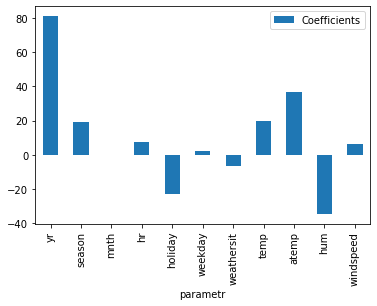

RMSE of test set is 20177.21457
R2 score of test set is 0.38581
EVS score of test set is 0.38618


Custom MSE test set is 20177.21457
Custom r2 test set is 0.38581
Custom EVS test set is 0.38618


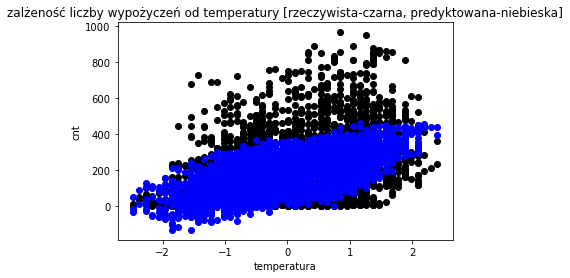

In [86]:
from sklearn import linear_model

def linear_regression(x_train, x_test, y_train, print_coefficiens=False):
    linear_reg = linear_model.LinearRegression()
    linear_reg.fit(x_train, y_train)
    linear_reg_pred = linear_reg.predict(x_test)
    if (print_coefficiens):
        linear_reg_coefficients = linear_reg.coef_[0]
        print("coefficients:\n", linear_reg_coefficients)
        index = ['yr', 'season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
        coefficients_frame = pd.DataFrame({'parametr': index, 'Coefficients': linear_reg_coefficients})
        coefficients_frame.plot.bar(x='parametr', y='Coefficients', rot=90)
        plt.show()
    return linear_reg_pred

linear = linear_regression(x_train, x_test, y_train, True)
a,b,c = statistics(linear, y_test, True)

Pierwszy wykres przedstawia graficzni macierz współczynników dla modelu regresji.
Następne dane przedstawiają miary skutecznośći modelu, pierwsza część przedstawia dane wyliczone z wykorzystaniem biblioteki sklearn.metrics, druga wyliczone przez nas.
Ostatni wykres przedstawia graficznie dane temperatury pochodzące ze zbioru testowego (czarny kolor) i wygenerowane przez regresję (niebieski kolor).

## Regresja wielomianowa

RMSE of test set is 15331.44124624092
R2 score of test set is 0.5333161872332124
EVS score of test set is 0.5334443326118306


Custom MSE test set is 15331.441246240927
Custom r2 test set is 0.5333161872332108
Custom EVS test set is 0.5334443326118306


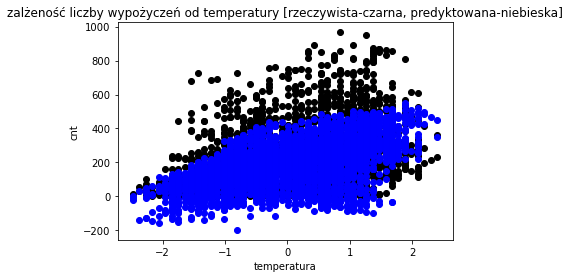

In [31]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(x_train, x_test, y_train):
    poly_features = PolynomialFeatures(2)
    x_train_poly = poly_features.fit_transform(x_train)
    poly_model = linear_model.LinearRegression()
    poly_model.fit(x_train_poly, y_train)
    poly_reg_pred = poly_model.predict(poly_features.fit_transform(x_test))
    return poly_reg_pred

polynomial = polynomial_regression(x_train, x_test, y_train)
a, b, c = statistics(polynomial, y_test, True)

Powyższe dane przedstawiają miary skutecznośći modelu, pierwsza część przedstawia dane wyliczone z wykorzystaniem biblioteki sklearn.metrics, druga wyliczone przez nas.
Ostatni wykres przedstawia graficznie dane temperatury pochodzące ze zbioru testowego (czarny kolor) i wygenerowane przez regresję (niebieski kolor).

## Decision Tree Regression

RMSE of test set is 3550.1672180667433
R2 score of test set is 0.8919341276089569
EVS score of test set is 0.891939428094875


Custom MSE test set is 3550.1672180667433
Custom r2 test set is 0.8919341276089565
Custom EVS test set is 0.891939428094875


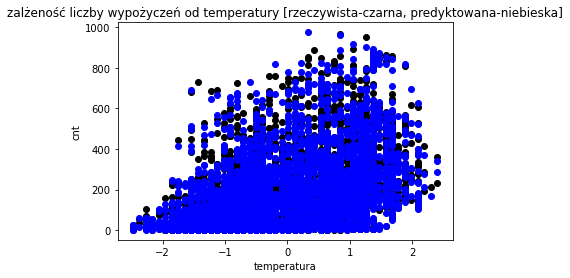

In [32]:
from sklearn.tree import DecisionTreeRegressor

def decision_tree_regression(x_train, x_test, y_train):
    dc_model =  DecisionTreeRegressor()  
    dc_model.fit(x_train, y_train)
    dc_reg_pred = dc_model.predict(x_test)
    return dc_reg_pred

decision_tree = decision_tree_regression(x_train, x_test, y_train)
a, b, c = statistics(decision_tree, y_test, True)


Powyższe dane przedstawiają miary skutecznośći modelu, pierwsza część przedstawia dane wyliczone z wykorzystaniem biblioteki sklearn.metrics, druga wyliczone przez nas.
Ostatni wykres przedstawia graficznie dane temperatury pochodzące ze zbioru testowego (czarny kolor) i wygenerowane przez regresję (niebieski kolor).

## Random Forrest Regression

RMSE of test set is 1978.924862631497
R2 score of test set is 0.9397622059636241
EVS score of test set is 0.9397646211356532


Custom MSE test set is 1978.9248626315004
Custom r2 test set is 0.9397622059636238
Custom EVS test set is 0.9397646211356532


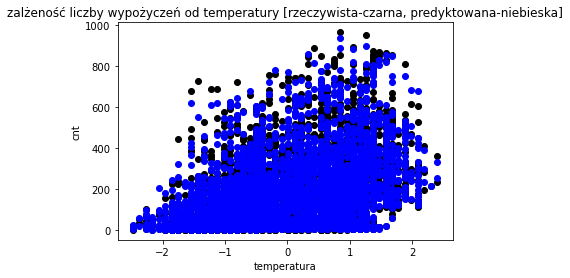

In [33]:
from sklearn.ensemble import RandomForestRegressor

def random_forrest_regression(x_train, x_test, y_train):
    rf_model =  RandomForestRegressor()
    rf_model.fit(x_train, y_train)
    rf_reg_pred = rf_model.predict(x_test)
    return rf_reg_pred

random_forrest = random_forrest_regression(x_train, x_test, y_train)
a, b, c = statistics(random_forrest, y_test, True)

Powyższe dane przedstawiają miary skutecznośći modelu, pierwsza część przedstawia dane wyliczone z wykorzystaniem biblioteki sklearn.metrics, druga wyliczone przez nas.
Ostatni wykres przedstawia graficznie dane temperatury pochodzące ze zbioru testowego (czarny kolor) i wygenerowane przez regresję (niebieski kolor).

## Voting Regressor

RMSE of test set is 2334.46848114314
R2 score of test set is 0.928939580169549
EVS score of test set is 0.9289400237981827


Custom MSE test set is 2334.4684811431407
Custom r2 test set is 0.9289395801695488
Custom EVS test set is 0.9289400237981827


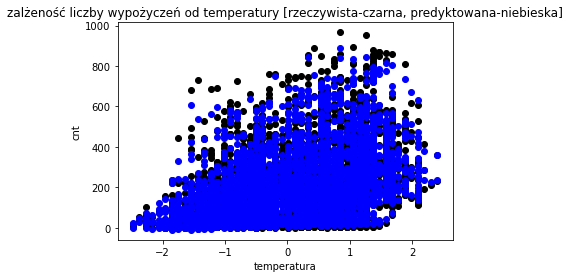

In [34]:
from sklearn.ensemble import VotingRegressor

def voting_regression(x_train, x_test, y_train):
    lr_model = linear_model.LinearRegression()
    dc_model = DecisionTreeRegressor()  
    rf_model = RandomForestRegressor()
    voting_model =  VotingRegressor([('lr', lr_model), ('dc', dc_model), ('rf', rf_model)],
                                    weights=[1, 4,5],n_jobs=-1)
    voting_model.fit(x_train, y_train)
    voiting_reg_pred = voting_model.predict(x_test)
    return voiting_reg_pred

voting_regressor = voting_regression(x_train, x_test, y_train)
a, b, c = statistics(voting_regressor, y_test, True)

Powyższe dane przedstawiają miary skutecznośći modelu, pierwsza część przedstawia dane wyliczone z wykorzystaniem biblioteki sklearn.metrics, druga wyliczone przez nas. Ostatni wykres przedstawia graficznie dane temperatury pochodzące ze zbioru testowego (czarny kolor) i wygenerowane przez regresję (niebieski kolor).

## Stacking Regressor

RMSE of test set is 2323.7025089653976
R2 score of test set is 0.9292672926698518
EVS score of test set is 0.9293298760727874


Custom MSE test set is 2323.702508965403
Custom r2 test set is 0.9292672926698514
Custom EVS test set is 0.9293298760727874


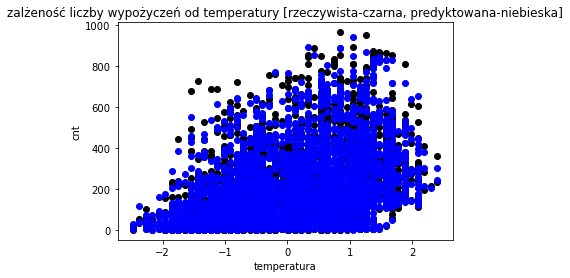

In [35]:
from sklearn.ensemble import StackingRegressor

def stacking_regression(x_train, x_test, y_train):
    lr_model = linear_model.LinearRegression()
    dc_model = DecisionTreeRegressor()  
    rf_model = RandomForestRegressor()
    estimators = [('lr', lr_model), ('dc', dc_model), ('rf', rf_model)]
    stacking_model = StackingRegressor(estimators=estimators, final_estimator=rf_model)
    stacking_model.fit(x_train, y_train)
    stacking_reg_pred = stacking_model.predict(x_test)
    return stacking_reg_pred

stacking_regressor = stacking_regression(x_train, x_test, y_train)
a, b, c = statistics(stacking_regressor, y_test, True)

Powyższe dane przedstawiają miary skutecznośći modelu, pierwsza część przedstawia dane wyliczone z wykorzystaniem biblioteki sklearn.metrics, druga wyliczone przez nas. Ostatni wykres przedstawia graficznie dane temperatury pochodzące ze zbioru testowego (czarny kolor) i wygenerowane przez regresję (niebieski kolor).

## K - krotna walidacja krzyżowa

In [36]:
from random import seed
from random import randrange

def cross_validation_split(data, folds):
    dataset = data.copy().to_numpy()
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

## Porównanie modeli regresji

In [37]:
def prepare_result(grid_search_optimalization=False):
    linear_results = list()
    polynomial_results = list()
    decision_tree_results = list()
    random_forrest_results = list()
    voting_results = list()
    stacking_results = list()

    linear_pred = linear_regression(x_train, x_test, y_train)
    polynomial_pred = polynomial_regression(x_train, x_test, y_train)
    linear_results.append(statistics(linear_pred, y_test))
    polynomial_results.append(statistics(polynomial_pred, y_test))

    if (not grid_search_optimalization):
        decision_tree_pred = decision_tree_regression(x_train, x_test, y_train)
        random_forrest_pred = random_forrest_regression(x_train, x_test, y_train)
        voting_pred = voting_regression(x_train, x_test, y_train)
        stacking_pred = stacking_regression(x_train, x_test, y_train)
    else:
        grid_search_dt_result = grid_search_on_decision_tree(x_train, y_train)
        grid_search_rf_result = grid_search_on_random_forrest(x_train, y_train)
        decision_tree_pred = decision_tree_regression_optimalized(x_train, x_test, y_train, grid_search_dt_result)
        random_forrest_pred = random_forrest_regression_optimalized(x_train, x_test, y_train, grid_search_rf_result)
        voting_pred = voting_regression_optimalized(x_train, x_test, y_train, grid_search_dt_result, grid_search_rf_result)
        stacking_pred = stacking_regression_optimalized(x_train, x_test, y_train, grid_search_dt_result, grid_search_rf_result)

    decision_tree_results.append(statistics(decision_tree_pred, y_test))
    random_forrest_results.append(statistics(random_forrest_pred, y_test))
    voting_results.append(statistics(voting_pred, y_test))
    stacking_results.append(statistics(stacking_pred, y_test))
        
    return linear_results, polynomial_results, decision_tree_results, random_forrest_results, voting_results, stacking_results

In [38]:
# podzial danych na traningowe i testowe w stosunku 1/k (k = 4 -> 25% danych testowych)
def prepare_result_with_k_fold(k, grid_search_optimalization=False):
    seed(1)
    folds = cross_validation_split(data, k)

    linear_results = list()
    polynomial_results = list()
    decision_tree_results = list()
    random_forrest_results = list()
    voting_results = list()
    stacking_results = list()
    grid_search_dt_result = []
    grid_search_rf_result = []
    
    if (grid_search_optimalization):
        grid_search_dt_result = grid_search_on_decision_tree(x_train, y_train)
        grid_search_rf_result = grid_search_on_random_forrest(x_train, y_train)

    for i in range(k):
        train = folds.copy()
        test = pd.DataFrame(folds[i])
        del train[i]
        train = pd.DataFrame([item for sublist in train for item in sublist])
        m, n = data.shape
        X_train = (train.iloc[:,:n-1])
        Y_train = (train.iloc[:,n-1:n])
        X_test = (test.iloc[:,:n-1])
        Y_test = (test.iloc[:,n-1:n])

        linear_pred = linear_regression(X_train, X_test, Y_train)
        polynomial_pred = polynomial_regression(X_train, X_test, Y_train)
        linear_results.append(statistics(linear_pred, Y_test))
        polynomial_results.append(statistics(polynomial_pred, Y_test))
        
        if (not grid_search_optimalization):
            decision_tree_pred = decision_tree_regression(X_train, X_test, Y_train)
            random_forrest_pred = random_forrest_regression(X_train, X_test, Y_train)
            voting_pred = voting_regression(X_train, X_test, Y_train)
            stacking_pred = stacking_regression(X_train, X_test, Y_train)
        else:
            decision_tree_pred = decision_tree_regression_optimalized(X_train, X_test, Y_train, grid_search_dt_result)
            random_forrest_pred = random_forrest_regression_optimalized(X_train, X_test, Y_train, grid_search_rf_result)
            voting_pred = voting_regression_optimalized(X_train, X_test, Y_train, grid_search_dt_result, grid_search_rf_result)
            stacking_pred = stacking_regression_optimalized(X_train, X_test, Y_train, grid_search_dt_result, grid_search_rf_result)

        decision_tree_results.append(statistics(decision_tree_pred, Y_test))
        random_forrest_results.append(statistics(random_forrest_pred, Y_test))
        voting_results.append(statistics(voting_pred, Y_test))
        stacking_results.append(statistics(stacking_pred, Y_test))
        
    return linear_results, polynomial_results, decision_tree_results, random_forrest_results, voting_results, stacking_results

In [102]:
from prettytable import PrettyTable

def add_row(table, result, model):
    avg_result = [sum(x) / len(x) for x in zip(*result)]
    table.add_row([model, round(avg_result[0],5), round(avg_result[1],5), round(avg_result[2],5)])
    
def createSummaryTable(summary_table, results):
    add_row(summary_table, results[0], "Linear Regression")
    add_row(summary_table, results[1], "Polynominal Regression")
    add_row(summary_table, results[2], "Decision Tree Regression")
    add_row(summary_table, results[3], "Random Forrest Regression")
    add_row(summary_table, results[4], "Voting Regressor")
    add_row(summary_table, results[5], "Stacking Regressor")  

def createSummary(k_fold = 0, grid_search_optimalization = False):
    summary_table = PrettyTable(['model', 'MSE', 'r2', 'Experience Variance'])
    if (k_fold < 2):
        results = prepare_result(grid_search_optimalization)
        createSummaryTable(summary_table, results)
        print("Summary table for result of regression models:\n", summary_table, "\n\n")
    else:
        results = prepare_result_with_k_fold(k_fold, grid_search_optimalization)
        createSummaryTable(summary_table, results)
        print("Summary table for result of regression models [K_fold: k =",k_fold,"]:\n", summary_table, "\n\n")

In [ ]:
createSummary() 
createSummary(k_fold = 2) 

In [230]:
createSummary() 
createSummary(k_fold = 2) 
createSummary(k_fold = 3) 
createSummary(k_fold = 5) 
createSummary(k_fold = 10) 

Summary table for result of regression models:
 +---------------------------+--------------------+--------------------+---------------------+
|           model           |        MSE         |         r2         | Experience Variance |
+---------------------------+--------------------+--------------------+---------------------+
|     Linear Regression     | 20177.214574539303 | 0.3858125092467478 | 0.38617685093263976 |
|   Polynominal Regression  | 15331.441246240927 | 0.5333161872332108 |  0.5334443326118306 |
|  Decision Tree Regression | 3468.1352848101264 | 0.8944311515198831 |  0.8944385829724519 |
| Random Forrest Regression | 1958.7379889773715 | 0.9403766874734467 |  0.9403837685942139 |
|      Voting Regressor     | 2281.773095008165  | 0.9305436096486899 |  0.9305445620336064 |
|     Stacking Regressor    | 2295.596934026953  | 0.9301228167306108 |  0.9301665163087851 |
+---------------------------+--------------------+--------------------+---------------------+ 


Summary t

Analizując powyższe wartośći najlepiej poradził sobie algorytm Random Forrest Regression. Uzyskał najniższą wartość MSE i najwyższe r^2 oraz Experience Variance (0.954).

Stacking Regressor poprawił w drobnym stopniu jakość regresji. Dla niego r^2 wyniółsło 0.956.

Natomiast biorąc pod uwagę k-krotną walidację krzyżową, to nie doszukujemy się znaczących różnic w rezultatach ich działan dla rónych wartości paramtru k. Co nie zmienia faktu, że daje ona znaczącą poprawę, wzgędem wyników bez jej zastosowania.

Wykonano zadania według zaleceń:)